## <center> Smart Lead Scoring Engine</center>



#### Problem Statement:
A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers). 

Leads are captured in 2 ways - <b>Directly and Indirectly.</b>

<b>Direct leads</b> are captured via forms embedded in the website while <b>indirect leads</b> are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.

Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.

Our task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.

In [166]:
#Importing the required libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#### Importing the train dataset:

In [168]:
df_train = pd.read_csv(r'E:\Hackathons\Smart_Lead_Scoring_Engine\train_wn75k28.csv')

# looking for the dataset
pd.set_option('display.max_columns', None)
df_train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


#### Importing the test dataset:

In [169]:
df_test = pd.read_csv(r'E:\Hackathons\Smart_Lead_Scoring_Engine\test_Wf7sxXF.csv')

df_test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [170]:
# Looking for the shape of the datasets

print('Shape of train dataset is:', df_train.shape)
print('Shape of test dataset is:', df_test.shape)

Shape of train dataset is: (39161, 19)
Shape of test dataset is: (13184, 18)


- The train dataset contains total <b>19 columns</b> including the target column.
- The train dataset contains <b>39161 rows.</b>
- <b> buy </b> is the target column in the train dataset.
- The test dataset contains <b>13184 rows and 18 columns.</b>

#### Checking for the columns:

In [171]:
print('The columns in the train dataset are:','\n'*2, df_train.columns,'\n'*2,'='*85)
print('\n','The columns in the test dataset are:','\n'*2, df_test.columns, '\n'*2, '='*85)

The columns in the train dataset are: 

 Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy'],
      dtype='object') 


 The columns in the test dataset are: 

 Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12'],
      dtype='object') 



#### Column Description:

<b><u>Train Dataset:</u></b>

1. <b>id</b> -- Unique identifier of a lead
2. <b>created_at</b> -- Date of lead dropped
3. <b>campaign_var_1 & campaign_var_2</b> -- campaign information of the lead
4. <b>products_purchased</b> -- No. of past products purchased at the time of dropping the lead
5. <b>signup_date</b> -- Sign up date of the user on the website
6. <b>user_activity_var_(1 to 12)</b> -- Derived activities of the user on the website
7. <b>buy</b> -- 0 or 1 indicating if the user will buy the product in next 3 months or not

------------------------------------------------------------------------------------------------------------------------

<b><u>Test Dataset:</u></b>

1. <b>id</b> -- Unique identifier of a lead
2. <b>created_at</b> -- Date of lead dropped
3. <b>campaign_var_1 & campaign_var_2</b> -- campaign information of the lead
4. <b>products_purchased</b> -- No. of past products purchased at the time of dropping the lead
5. <b>signup_date</b> -- Sign up date of the user on the website
6. <b>user_activity_var_(1 to 12)</b> -- Derived activities of the user on the website

#### Checking the data type of the columns

In [172]:
# For trian dataset:

df_train.dtypes

id                        int64
created_at               object
campaign_var_1            int64
campaign_var_2            int64
products_purchased      float64
signup_date              object
user_activity_var_1       int64
user_activity_var_2       int64
user_activity_var_3       int64
user_activity_var_4       int64
user_activity_var_5       int64
user_activity_var_6       int64
user_activity_var_7       int64
user_activity_var_8       int64
user_activity_var_9       int64
user_activity_var_10      int64
user_activity_var_11      int64
user_activity_var_12      int64
buy                       int64
dtype: object

- All the columns contains integer values except created_at, products_purchased, and signup_date.
- We can see that created_at and signup_date coulmns contains date so we'll change the data type to datetime for better understanding later.
- products_purchased column contains the number of past items purchased by the customers. So, it would be better if we change its type to integer datatype as items can't be in float.

#### Checking the null values in the train and test datasets:

In [173]:
#Null values or missing values in train dataset:

print('Column wise missing values in the train dataset are:','\n'*2,df_train.isnull().sum(),'\n','-'*70)
print('\n','Column wise missing values in the test dataset are:','\n'*2,df_test.isnull().sum(),'\n','-'*70)

Column wise missing values in the train dataset are: 

 id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64 
 ----------------------------------------------------------------------

 Column wise missing values in the test dataset are: 

 id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0

We found that product_purchased and signup_date columns contain missing values in both the datasets. 

- <b><u>Train Dataset:</u></b>
 - 20911 missing values in the products_purchased column.
 - 15113 missing values in the signup_date column.
 
- <b><u>Test Dataset:</u></b>
 - 8136 missing values in the products_purchased column.
 - 6649 missing values in the signup_date column.

### Handling the missing values:

1. <b><u>products_purchased column (Train dateset):</u></b>

We know this column contains the number of items purchased by the customer. So, we can replace the missing values with the most occuring items(mode value) number which is commonly purchased by the customers.

In [174]:
# Checking for the values:

df_train['products_purchased'].value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

- We found that most of the customers like to purchase 2 items, so we'll replace the missing values with 2

In [175]:
df_train['products_purchased'] = df_train['products_purchased'].fillna(2)

df_train.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased          0
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [176]:
# Changing the products_purchased column from float to integer data type

df_train['products_purchased'] = df_train['products_purchased'].astype(int)

df_train.dtypes

id                       int64
created_at              object
campaign_var_1           int64
campaign_var_2           int64
products_purchased       int32
signup_date             object
user_activity_var_1      int64
user_activity_var_2      int64
user_activity_var_3      int64
user_activity_var_4      int64
user_activity_var_5      int64
user_activity_var_6      int64
user_activity_var_7      int64
user_activity_var_8      int64
user_activity_var_9      int64
user_activity_var_10     int64
user_activity_var_11     int64
user_activity_var_12     int64
buy                      int64
dtype: object

2. <b><u>products_purchased column (Test dateset):</u></b>

In [177]:
df_test['products_purchased'].value_counts()

2.0    2484
3.0    1260
1.0    1106
4.0     198
Name: products_purchased, dtype: int64

In [178]:
# Replaceing the missing values with 2

df_test['products_purchased'] = df_test['products_purchased'].fillna(2)

df_test.isnull().sum()

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased         0
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

In [179]:
# Changing the products_purchased column from float to integer data type

df_test['products_purchased'] = df_test['products_purchased'].astype(int)

df_test.dtypes

id                       int64
created_at              object
campaign_var_1           int64
campaign_var_2           int64
products_purchased       int32
signup_date             object
user_activity_var_1      int64
user_activity_var_2      int64
user_activity_var_3      int64
user_activity_var_4      int64
user_activity_var_5      int64
user_activity_var_6      int64
user_activity_var_7      int64
user_activity_var_8      int64
user_activity_var_9      int64
user_activity_var_10     int64
user_activity_var_11     int64
user_activity_var_12     int64
dtype: object

In [180]:
# Dropping the missing values in the signup date column

df_train = df_train.dropna(axis = 0)

df_test = df_test.dropna(axis = 0)

In [181]:
df_train.isnull().sum()

id                      0
created_at              0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
signup_date             0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
dtype: int64

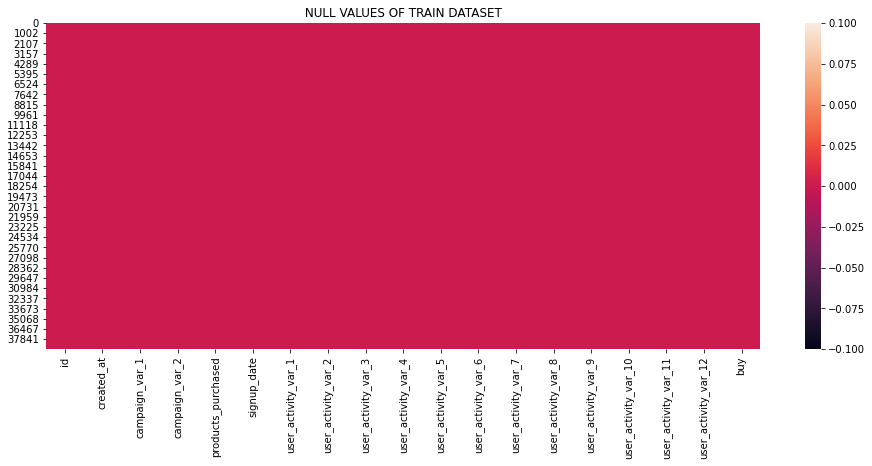

In [182]:
#checking the missing values using heatmap for train dataset

plt.figure(figsize=[16,6])
sns.heatmap(df_train.isnull())
plt.title(" NULL VALUES OF TRAIN DATASET ")
plt.show()

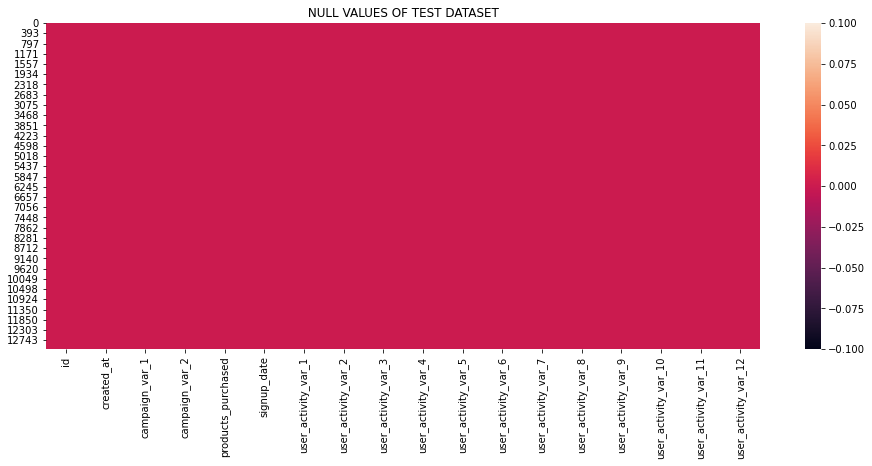

In [183]:
#checking the missing values using heatmap for test dataset

plt.figure(figsize=[16,6])
sns.heatmap(df_test.isnull())
plt.title(" NULL VALUES OF TEST DATASET ")
plt.show()

#### Checking if the target column is balanced or not

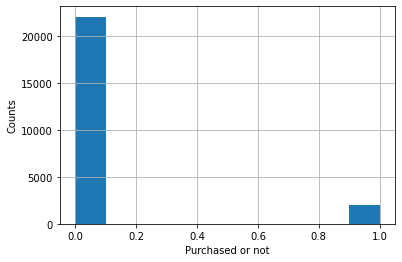

In [184]:
# Plotting graph to show the distribution of 'buy' column.

df_train['buy'].hist(grid=True)
plt.xlabel('Purchased or not')
plt.ylabel('Counts')
plt.show()

- This clearly shows that the target column is not balanced. We'll balance it later.

In [185]:
#Checking the description of the train dataset

df_train.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,24048.000000,24048.000000,24048.000000,24048.000000,24048.00000,24048.000000,24048.000000,24048.000000,24048.000000,24048.000000,24048.000000,24048.000000,24048.000000,24048.000000,24048.000000,24048.000000,24048.000000
mean,18679.588781,6.129533,6.116101,2.091276,0.39155,0.010687,0.108242,0.017881,0.161469,0.515677,0.302104,0.135604,0.018421,0.000624,0.238357,0.000707,0.082044
std,11318.514543,3.371913,2.546869,0.609821,0.50675,0.102826,0.310692,0.132521,0.369774,0.564031,0.462518,0.342496,0.134473,0.024968,0.453966,0.026579,0.274438
min,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8811.750000,3.000000,4.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18243.500000,6.000000,6.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28347.250000,8.000000,8.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.00000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [186]:
#Checking the description of the test dataset

df_test.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
count,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000
mean,45502.483703,7.209028,7.485386,2.058914,0.370161,0.008416,0.110329,0.012395,0.166182,0.551798,0.327774,0.103137,0.016985,0.000459,0.295180,0.000459
std,3773.394047,3.507970,2.666390,0.591533,0.503976,0.091360,0.313323,0.110648,0.373504,0.573923,0.473010,0.304161,0.130406,0.021423,0.507911,0.021423
min,39162.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42228.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45382.000000,7.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48735.000000,10.000000,9.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,52343.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000


### Merging the train and test dataset in single data:

In [187]:
df_train['Source'] = 'train'
df_test['Source'] = 'test'

df = pd.concat([df_train,df_test], ignore_index=True)

#Checking the final dataset df

df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,Source
0,1,2021-01-01,1,2,2,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0.0,train
1,2,2021-01-01,2,1,2,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0.0,train
2,3,2021-01-01,9,3,3,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0.0,train
3,4,2021-01-01,6,7,2,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0.0,train
4,5,2021-01-01,4,6,2,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0.0,train


In [188]:
# Splitting the created_at into day, month, and year

df[["year", "month", "day"]] = df['created_at'].str.split("-", expand=True)

df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,Source,year,month,day
0,1,2021-01-01,1,2,2,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0.0,train,2021,01,01
1,2,2021-01-01,2,1,2,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0.0,train,2021,01,01
2,3,2021-01-01,9,3,3,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0.0,train,2021,01,01
3,4,2021-01-01,6,7,2,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0.0,train,2021,01,01
4,5,2021-01-01,4,6,2,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0.0,train,2021,01,01


In [189]:
# Splitting the products_purchased into day. month, and year

df[['signup_year', 'signup_month', 'signup_day']] = df['signup_date'].str.split("-", expand=True)

df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,Source,year,month,day,signup_year,signup_month,signup_day
0,1,2021-01-01,1,2,2,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0.0,train,2021,01,01,2020,09,24
1,2,2021-01-01,2,1,2,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0.0,train,2021,01,01,2020,09,19
2,3,2021-01-01,9,3,3,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0.0,train,2021,01,01,2021,08,11
3,4,2021-01-01,6,7,2,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0.0,train,2021,01,01,2017,10,04
4,5,2021-01-01,4,6,2,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0.0,train,2021,01,01,2020,06,08


In [190]:
# Dropping the columns created_at and signup_date as we've splitted the values

df = df.drop(['created_at', 'signup_date'], axis = 1)

df.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,Source,year,month,day,signup_year,signup_month,signup_day
0,1,1,2,2,0,0,0,0,0,0,1,1,0,0,0,0,0.0,train,2021,01,01,2020,09,24
1,2,2,1,2,1,0,1,0,0,0,1,0,0,0,0,0,0.0,train,2021,01,01,2020,09,19
2,3,9,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0.0,train,2021,01,01,2021,08,11
3,4,6,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0.0,train,2021,01,01,2017,10,04
4,5,4,6,2,0,0,0,0,0,0,1,0,0,0,1,0,0.0,train,2021,01,01,2020,06,08


In [191]:
# Checking for the datatype again

df.dtypes

id                        int64
campaign_var_1            int64
campaign_var_2            int64
products_purchased        int32
user_activity_var_1       int64
user_activity_var_2       int64
user_activity_var_3       int64
user_activity_var_4       int64
user_activity_var_5       int64
user_activity_var_6       int64
user_activity_var_7       int64
user_activity_var_8       int64
user_activity_var_9       int64
user_activity_var_10      int64
user_activity_var_11      int64
user_activity_var_12      int64
buy                     float64
Source                   object
year                     object
month                    object
day                      object
signup_year              object
signup_month             object
signup_day               object
dtype: object

In [192]:
# Checking for the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30583 entries, 0 to 30582
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    30583 non-null  int64  
 1   campaign_var_1        30583 non-null  int64  
 2   campaign_var_2        30583 non-null  int64  
 3   products_purchased    30583 non-null  int32  
 4   user_activity_var_1   30583 non-null  int64  
 5   user_activity_var_2   30583 non-null  int64  
 6   user_activity_var_3   30583 non-null  int64  
 7   user_activity_var_4   30583 non-null  int64  
 8   user_activity_var_5   30583 non-null  int64  
 9   user_activity_var_6   30583 non-null  int64  
 10  user_activity_var_7   30583 non-null  int64  
 11  user_activity_var_8   30583 non-null  int64  
 12  user_activity_var_9   30583 non-null  int64  
 13  user_activity_var_10  30583 non-null  int64  
 14  user_activity_var_11  30583 non-null  int64  
 15  user_activity_var_1

In [193]:
# Changing the data types of year,month,day

df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)
df['signup_year'] = df['signup_year'].astype(int)
df['signup_month'] = df['signup_month'].astype(int)
df['signup_day'] = df['signup_day'].astype(int)

df.dtypes

id                        int64
campaign_var_1            int64
campaign_var_2            int64
products_purchased        int32
user_activity_var_1       int64
user_activity_var_2       int64
user_activity_var_3       int64
user_activity_var_4       int64
user_activity_var_5       int64
user_activity_var_6       int64
user_activity_var_7       int64
user_activity_var_8       int64
user_activity_var_9       int64
user_activity_var_10      int64
user_activity_var_11      int64
user_activity_var_12      int64
buy                     float64
Source                   object
year                      int32
month                     int32
day                       int32
signup_year               int32
signup_month              int32
signup_day                int32
dtype: object

In [194]:
df.dtypes

id                        int64
campaign_var_1            int64
campaign_var_2            int64
products_purchased        int32
user_activity_var_1       int64
user_activity_var_2       int64
user_activity_var_3       int64
user_activity_var_4       int64
user_activity_var_5       int64
user_activity_var_6       int64
user_activity_var_7       int64
user_activity_var_8       int64
user_activity_var_9       int64
user_activity_var_10      int64
user_activity_var_11      int64
user_activity_var_12      int64
buy                     float64
Source                   object
year                      int32
month                     int32
day                       int32
signup_year               int32
signup_month              int32
signup_day                int32
dtype: object

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'campaign_var_1'}>,
        <AxesSubplot:title={'center':'campaign_var_2'}>,
        <AxesSubplot:title={'center':'products_purchased'}>,
        <AxesSubplot:title={'center':'user_activity_var_1'}>,
        <AxesSubplot:title={'center':'user_activity_var_2'}>],
       [<AxesSubplot:title={'center':'user_activity_var_3'}>,
        <AxesSubplot:title={'center':'user_activity_var_4'}>,
        <AxesSubplot:title={'center':'user_activity_var_5'}>,
        <AxesSubplot:title={'center':'user_activity_var_6'}>,
        <AxesSubplot:title={'center':'user_activity_var_7'}>,
        <AxesSubplot:title={'center':'user_activity_var_8'}>],
       [<AxesSubplot:title={'center':'user_activity_var_9'}>,
        <AxesSubplot:title={'center':'user_activity_var_10'}>,
        <AxesSubplot:title={'center':'user_activity_var_11'}>,
        <AxesSubplot:title={'center':'user_activity_var_12'}>,
        <AxesSubplot:title={'ce

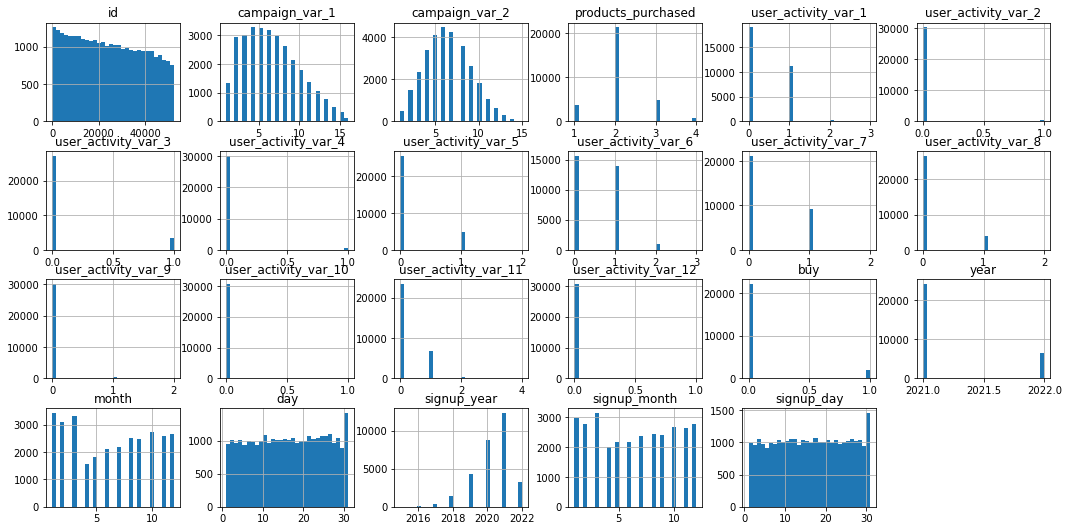

In [195]:
# Plotting the histogram for univariant analysis to check the normal distribution

df.hist(figsize=[18,16], grid=True, layout=(7,6), bins=30)

#### Checking for the Statistical Summary:

In [196]:
df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,year,month,day,signup_year,signup_month,signup_day
count,30583.000000,30583.000000,30583.000000,30583.000000,30583.000000,30583.000000,30583.000000,30583.000000,30583.000000,30583.000000,30583.000000,30583.000000,30583.000000,30583.000000,30583.000000,30583.000000,24048.000000,30583.000000,30583.000000,30583.000000,30583.000000,30583.000000,30583.000000
mean,24411.126508,6.360200,6.408691,2.084361,0.386980,0.010202,0.108688,0.016709,0.162476,0.523395,0.307589,0.128666,0.018115,0.000589,0.250499,0.000654,0.082044,2021.213681,6.328614,15.846189,2020.341857,6.445803,15.787464
std,14988.845256,3.430047,2.633343,0.606095,0.506226,0.100489,0.311252,0.128180,0.370573,0.566343,0.464892,0.334933,0.133613,0.024254,0.466591,0.025565,0.274438,0.409911,3.661381,8.736076,1.094347,3.591403,8.756874
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,1.000000,1.000000,2015.000000,1.000000,1.000000
25%,11321.500000,4.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,3.000000,8.000000,2020.000000,3.000000,8.000000
50%,23656.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,6.000000,16.000000,2021.000000,7.000000,16.000000
75%,37188.500000,9.000000,8.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,10.000000,23.000000,2021.000000,10.000000,23.000000
max,52343.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2022.000000,12.000000,31.000000,2022.000000,12.000000,31.000000


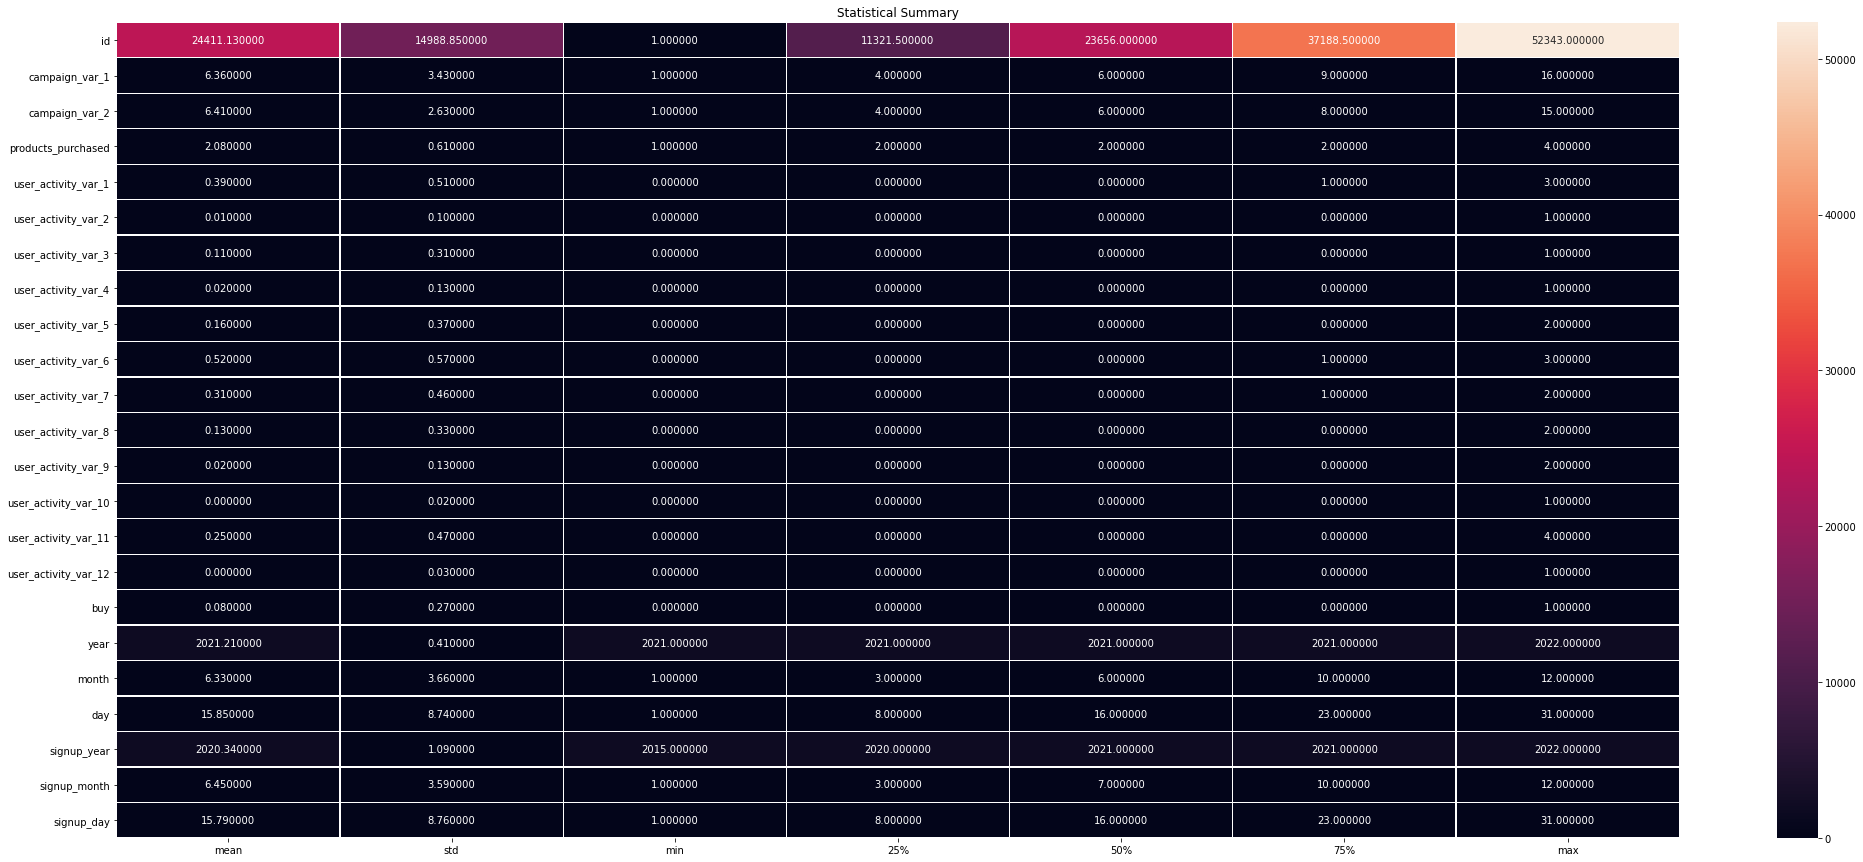

In [197]:
# Plotting Heatmap for Statistical Summary

plt.figure(figsize=[35,15])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Statistical Summary')
plt.show()

#### Checking for the correlation:

In [198]:
df.corr()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,year,month,day,signup_year,signup_month,signup_day
id,1.000000,0.181050,0.286648,-0.033107,-0.001334,-0.011742,-0.000318,-0.017850,-0.000275,0.035106,0.032538,-0.057402,-0.012503,-0.000177,0.055810,-0.011097,-0.002711,0.733545,0.057456,0.031154,0.198467,-0.010696,0.005265
campaign_var_1,0.181050,1.000000,0.568092,-0.020389,0.010415,-0.035801,-0.011281,-0.033547,-0.018749,0.034747,-0.062634,-0.023208,-0.060186,-0.008051,-0.017663,-0.013873,-0.081050,0.129006,0.017632,0.019782,-0.026664,0.005219,-0.001378
campaign_var_2,0.286648,0.568092,1.000000,0.004355,-0.047215,-0.043807,-0.004368,-0.044353,-0.029279,0.071150,-0.035619,-0.051429,-0.065929,-0.010934,0.001810,-0.009313,-0.066640,0.213145,0.015135,0.019378,0.014571,0.011593,-0.000247
products_purchased,-0.033107,-0.020389,0.004355,1.000000,-0.008250,0.005197,0.005648,0.010898,-0.000173,-0.003368,0.006664,0.001134,0.002126,0.001071,-0.002808,-0.005671,-0.004494,-0.021887,-0.005980,-0.002267,-0.142474,0.001049,0.002454
user_activity_var_1,-0.001334,0.010415,-0.047215,-0.008250,1.000000,0.023952,-0.021857,0.027844,-0.004515,-0.193023,-0.086467,-0.041226,0.046706,0.013408,-0.052419,0.008238,0.063234,-0.017320,0.022544,-0.003576,-0.011679,0.001006,-0.006946
user_activity_var_2,-0.011742,-0.035801,-0.043807,0.005197,0.023952,1.000000,-0.001997,0.128929,0.066127,-0.004194,-0.029375,-0.035115,0.132359,0.037786,0.102409,0.022860,0.347654,-0.009263,0.001819,-0.002049,-0.023389,-0.002636,-0.001215
user_activity_var_3,-0.000318,-0.011281,-0.004368,0.005648,-0.021857,-0.001997,1.000000,0.002836,0.028046,-0.052638,-0.002356,-0.023113,-0.000954,0.017515,-0.026717,0.011614,0.002653,0.002749,-0.003022,-0.011553,0.003328,-0.007133,-0.003306
user_activity_var_4,-0.017850,-0.033547,-0.044353,0.010898,0.027844,0.128929,0.002836,1.000000,0.080526,-0.025880,-0.010524,-0.039414,0.201892,0.038909,0.084742,0.036580,0.398738,-0.017544,0.005510,-0.004655,-0.043752,0.010100,-0.000390
user_activity_var_5,-0.000275,-0.018749,-0.029279,-0.000173,-0.004515,0.066127,0.028046,0.080526,1.000000,-0.083628,-0.014503,-0.038818,0.091789,0.025742,0.047708,0.026752,0.200559,0.005214,-0.007974,-0.005128,-0.037388,-0.004501,-0.007939
user_activity_var_6,0.035106,0.034747,0.071150,-0.003368,-0.193023,-0.004194,-0.052638,-0.025880,-0.083628,1.000000,-0.168728,-0.058018,-0.023318,0.001378,-0.079038,0.003460,-0.021339,0.026144,0.001685,0.004891,0.028538,-0.009903,0.006053


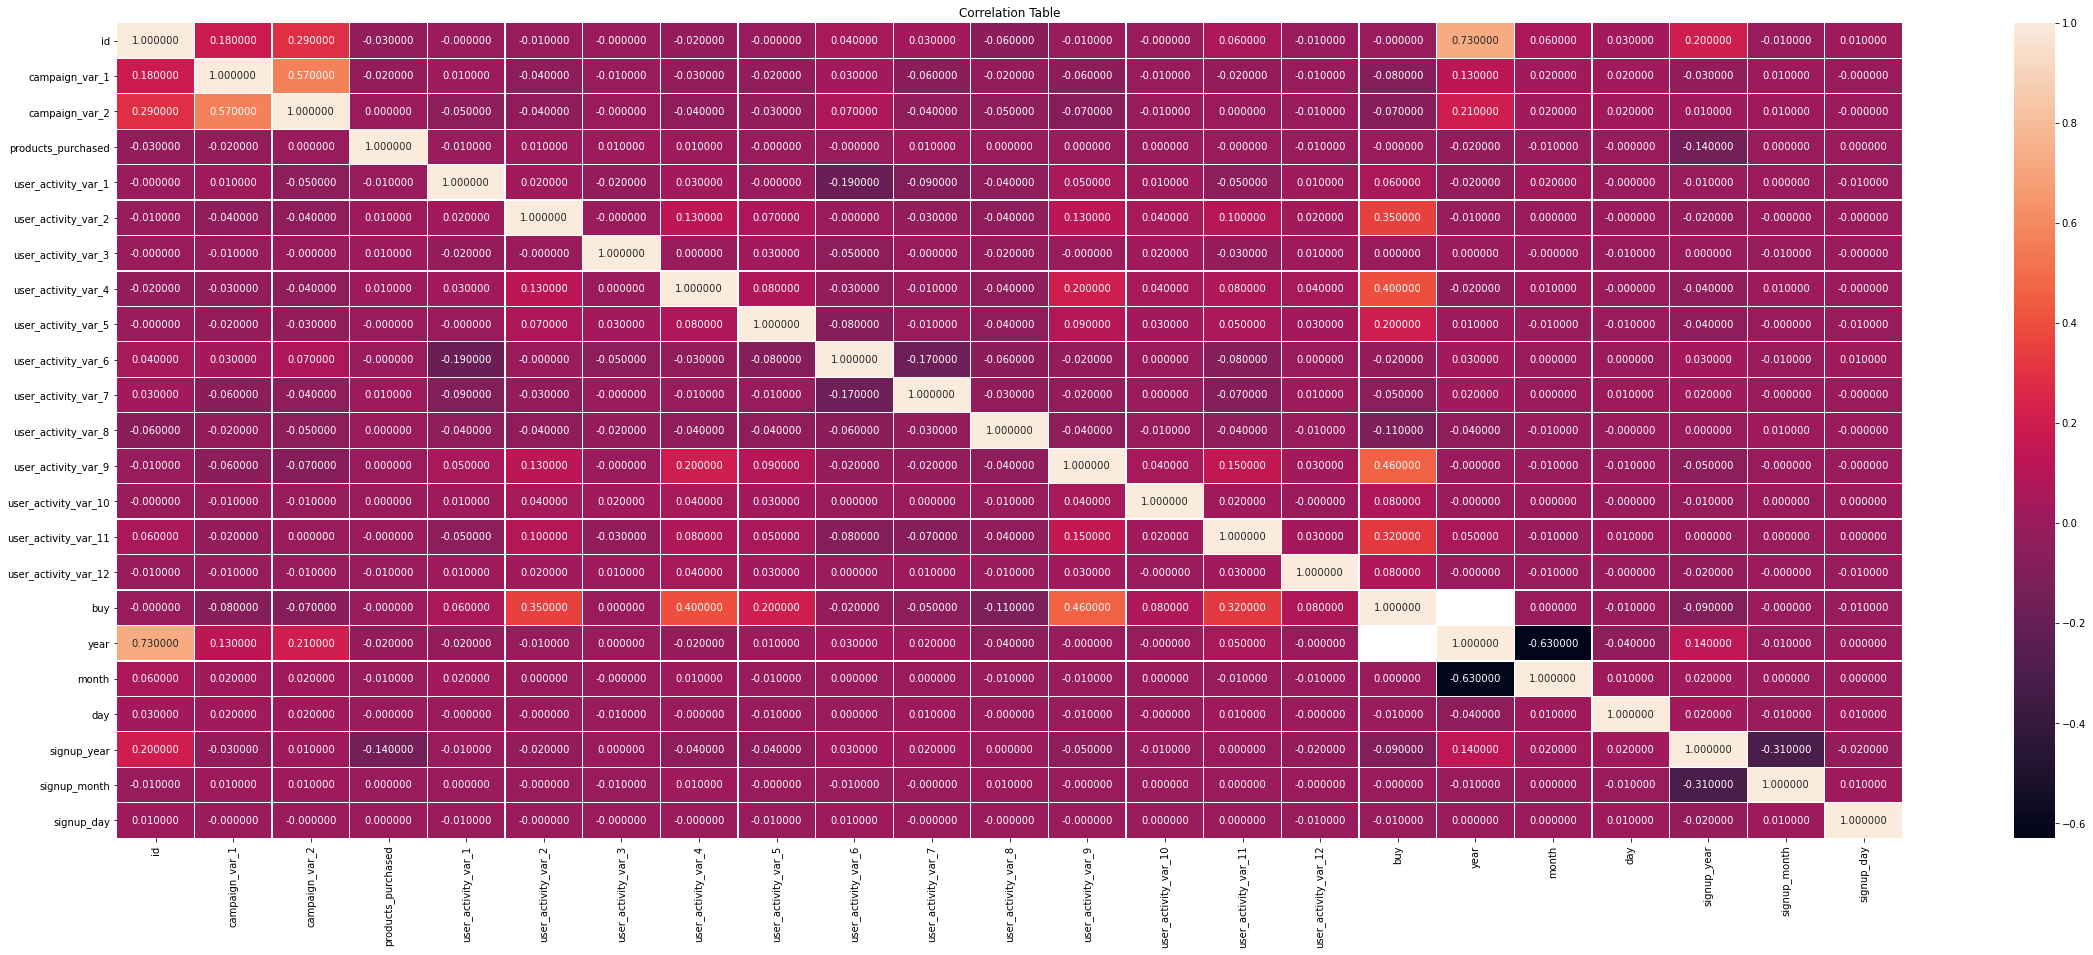

In [199]:
# Plotting heatmap for the correlation table

plt.figure(figsize=[40,15])
sns.heatmap(round(df.corr().transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.show()

In [200]:
corr_matrix = df.corr()
corr_matrix['buy'].sort_values(ascending = False)

buy                     1.000000
user_activity_var_9     0.458233
user_activity_var_4     0.398738
user_activity_var_2     0.347654
user_activity_var_11    0.316673
user_activity_var_5     0.200559
user_activity_var_10    0.083566
user_activity_var_12    0.077564
user_activity_var_1     0.063234
user_activity_var_3     0.002653
month                   0.000256
id                     -0.002711
signup_month           -0.003803
products_purchased     -0.004494
day                    -0.007047
signup_day             -0.012384
user_activity_var_6    -0.021339
user_activity_var_7    -0.046866
campaign_var_2         -0.066640
campaign_var_1         -0.081050
signup_year            -0.092508
user_activity_var_8    -0.105539
year                         NaN
Name: buy, dtype: float64

- id column has max correlation approx 95%
- month has least correlation approx - 60%

#### Splitting the dataset into training and test dataset:

In [201]:
#training dataset:

train_data = df[:24048]

train_data = train_data.drop(['Source'],axis = 1)

train_data.tail()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,year,month,day,signup_year,signup_month,signup_day
24043,39149,9,6,2,0,0,0,0,0,1,0,0,0,0,1,0,0.0,2021,12,31,2020,4,12
24044,39150,1,5,3,0,0,0,0,0,0,1,0,0,0,0,0,0.0,2021,12,31,2021,5,20
24045,39155,7,11,3,0,0,0,0,0,1,0,0,0,0,0,0,0.0,2021,12,31,2020,11,3
24046,39157,11,11,2,1,0,0,0,1,1,1,0,0,0,0,0,0.0,2021,12,31,2017,10,19
24047,39161,2,5,2,1,0,0,0,0,0,1,0,0,0,0,0,0.0,2021,12,31,2019,8,11


In [202]:
# Changing the data type of buy column

train_data['buy'] = train_data['buy'].astype(int)

train_data.dtypes

id                      int64
campaign_var_1          int64
campaign_var_2          int64
products_purchased      int32
user_activity_var_1     int64
user_activity_var_2     int64
user_activity_var_3     int64
user_activity_var_4     int64
user_activity_var_5     int64
user_activity_var_6     int64
user_activity_var_7     int64
user_activity_var_8     int64
user_activity_var_9     int64
user_activity_var_10    int64
user_activity_var_11    int64
user_activity_var_12    int64
buy                     int32
year                    int32
month                   int32
day                     int32
signup_year             int32
signup_month            int32
signup_day              int32
dtype: object

In [203]:
#testing dataset:

test_data = df[24048:]

test_data = test_data.drop(['Source', 'buy'],axis = 1)

test_data.tail()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,year,month,day,signup_year,signup_month,signup_day
30578,52333,13,10,2,0,0,0,0,0,0,0,0,0,0,1,0,2022,3,30,2021,9,29
30579,52337,14,12,2,1,0,0,0,0,1,0,0,0,0,0,0,2022,3,30,2020,3,18
30580,52338,3,8,1,0,0,0,0,0,0,1,0,0,0,1,0,2022,3,30,2021,11,12
30581,52342,12,8,2,1,0,0,0,0,1,0,0,0,0,0,0,2022,3,30,2022,3,19
30582,52343,14,14,3,0,0,1,0,0,0,1,0,0,0,0,0,2022,3,30,2021,8,15


#### Checking for the skewness & outliers (training data)

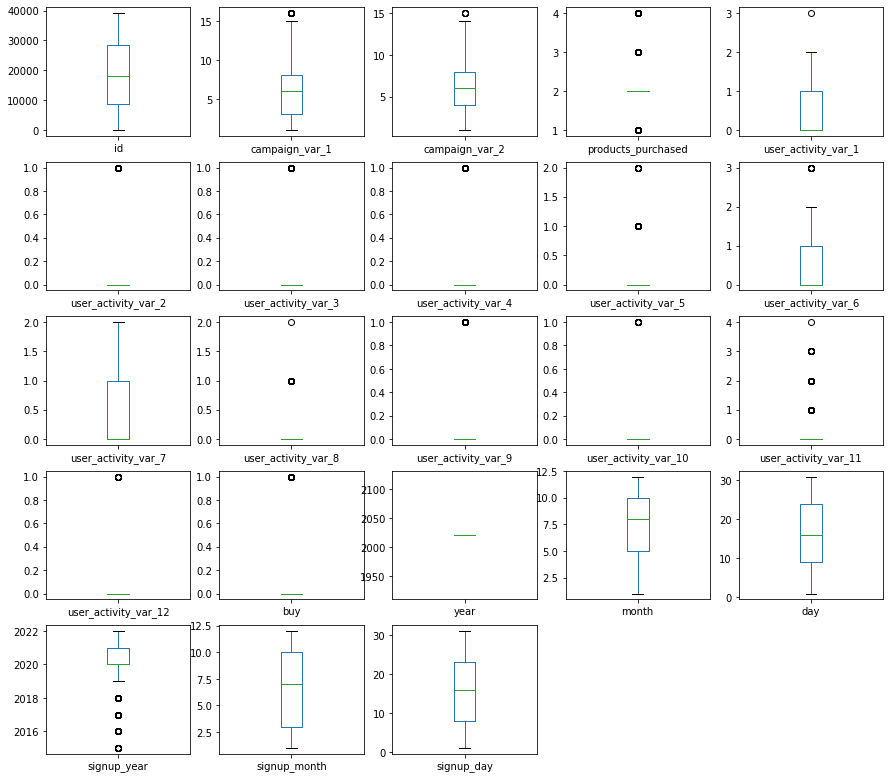

In [204]:
# Checking for the outliers

train_data.plot(kind='box', subplots=True, layout=(16,5), sharex=False, legend=True, figsize=(15,45))
plt.show()

In [205]:
# Dividing the independent and dependent variables

x=train_data.drop('buy',axis=1)
y=train_data['buy']

#### Checking the skewness:

In [206]:
x.skew()

id                       0.093988
campaign_var_1           0.535232
campaign_var_2           0.282503
products_purchased       0.579496
user_activity_var_1      0.659238
user_activity_var_2      9.518093
user_activity_var_3      2.522052
user_activity_var_4      7.276702
user_activity_var_5      1.879562
user_activity_var_6      0.525287
user_activity_var_7      0.908615
user_activity_var_8      2.131923
user_activity_var_9      7.163071
user_activity_var_10    40.005003
user_activity_var_11     1.686843
user_activity_var_12    37.573462
year                     0.000000
month                   -0.348671
day                     -0.038158
signup_year             -0.756773
signup_month            -0.003737
signup_day              -0.005731
dtype: float64

#### Outcome of skewness:

Skewness threshold is taken as +/-0.5.

###### Columns having skewness are:

- user_activity_var_1      0.659238
- user_activity_var_2      9.518093
- user_activity_var_3      2.522052
- user_activity_var_4      7.276702
- user_activity_var_5      1.879562
- user_activity_var_7      0.908615
- user_activity_var_8      2.131923
- user_activity_var_9      7.163071
- user_activity_var_10    40.005003
- user_activity_var_11     1.686843
- user_activity_var_12    37.573462
- buy                      3.046158

We'll remove the skewness using power_transform method

In [207]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

x_over, y_over = sm.fit_resample(x, y)

In [208]:
y_over.value_counts()

1    22075
0    22075
Name: buy, dtype: int64

- We can see now the target column is balanced.

#### Finding best RandomState:

In [209]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.25,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.7739626743975357  on Random_State  67


#### Data Preprocessing:

In [210]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over,y_over, test_size=0.25, random_state=67)

### Model Training:

#### 1. LogisticRegression:

In [211]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

LR.fit(x_train,y_train)
predlr = LR.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.7739626743975357
[[4248 1295]
 [1200 4295]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      5543
           1       0.77      0.78      0.77      5495

    accuracy                           0.77     11038
   macro avg       0.77      0.77      0.77     11038
weighted avg       0.77      0.77      0.77     11038



- From LogisticRegression, we're getting 77% accuracy score.

#### 2. RandomForestClassifier:

In [212]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
predrf = RF.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

0.9227215075194781
[[5010  533]
 [ 320 5175]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      5543
           1       0.91      0.94      0.92      5495

    accuracy                           0.92     11038
   macro avg       0.92      0.92      0.92     11038
weighted avg       0.92      0.92      0.92     11038



- Using RandomForestClassifier we're getting 92% accuracy

#### 3. DecisionTreeClassifier:

In [213]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
preddt = DT.predict(x_test)

print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.8669142960681283
[[4638  905]
 [ 564 4931]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      5543
           1       0.84      0.90      0.87      5495

    accuracy                           0.87     11038
   macro avg       0.87      0.87      0.87     11038
weighted avg       0.87      0.87      0.87     11038



- We're getting accuracy score of approx 87% using DecisionTreeClassifier.

#### Let's check for the cross validation score:

In [214]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x, y, cv=5)
print("Cross validation score for LogisticRegresssion is ", scr.mean())

Cross validation score for LogisticRegresssion is  0.9286427864593805


In [215]:
scr = cross_val_score(RF, x, y, cv = 5)
print("Cross validation score for RandonForestClassifier is ", scr.mean())

Cross validation score for RandonForestClassifier is  0.9599134592147693


In [216]:
scr = cross_val_score(DT, x, y, cv =5)
print("Cross validation score for DecisionTreeClassifier is ", scr.mean())

Cross validation score for DecisionTreeClassifier is  0.9041516231909246


- As we checked, we're getting minimum difference between the accuracy score and cross validation score for RandomForestClassifier (3.88). So, the best model is RandomForestClassifier.

#### Hyper parameter tuning:

In [217]:
from sklearn.model_selection import GridSearchCV

#DecisionTreeClassifier:
params = {'max_depth': [4, 5, 10, 20],
    'max_features': [2, 3],
    'n_estimators': [100, 200, 300, 400]}

In [218]:
GCV = GridSearchCV(RandomForestClassifier(), params, cv=3)

In [219]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 10, 20], 'max_features': [2, 3],
                         'n_estimators': [100, 200, 300, 400]})

In [220]:
# Finding the best parameter found by GridSearchCV

GCV.best_params_

{'max_depth': 20, 'max_features': 2, 'n_estimators': 200}

In [221]:
model = RandomForestClassifier(max_depth= 20, max_features = 2, n_estimators=200)
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9132995107809386
[[4932  611]
 [ 346 5149]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      5543
           1       0.89      0.94      0.91      5495

    accuracy                           0.91     11038
   macro avg       0.91      0.91      0.91     11038
weighted avg       0.91      0.91      0.91     11038



- After hyper parameter tuning we got 91% accuracy score.

### AUC ROC Curve:

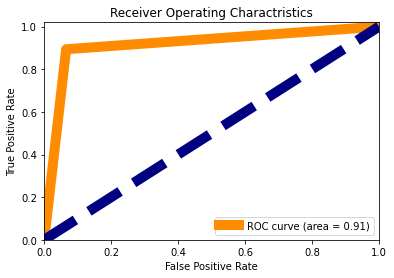

In [222]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color ='darkorange', lw=10, label ='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charactristics')
plt.legend(loc='lower right')

plt.show()

#### Saving the model:

In [223]:
import pickle
filename = 'smart_lead_scoring_engine.pkl'
pickle.dump(model, open(filename, 'wb'))

#### Conclusion:

In [224]:
a = np.array(y_test)
predicted = np.array(model.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
11033,0,0
11034,0,1
11035,1,1
11036,1,1


## Prediction on the test dataset:

In [225]:
test_sub = pd.read_csv(r'E:\Hackathons\Smart_Lead_Scoring_Engine\test_Wf7sxXF.csv')

test_sub.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [226]:
# Splitting the created_at into day, month, and year

test_sub[["year", "month", "day"]] = test_sub['created_at'].str.split("-", expand=True)
test_sub[['signup_year', 'signup_month', 'signup_day']] = test_sub['signup_date'].str.split("-", expand=True)
test_sub.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,year,month,day,signup_year,signup_month,signup_day
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0,2022,01,01,2021,08,17
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0,2022,01,01,2020,05,21
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0,2022,01,01,NaN,NaN,NaN
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0,2022,01,01,2020,06,22
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0,2022,01,01,2021,03,10


In [227]:
# Dropping created_at and signup_date

test_sub = test_sub.drop(['created_at','signup_date'], axis = 1)

test_sub.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,year,month,day,signup_year,signup_month,signup_day
0,39162,2,2,NaN,1,1,0,0,0,1,0,0,0,0,1,0,2022,01,01,2021,08,17
1,39163,4,7,3.0,1,0,0,0,0,0,0,1,0,0,0,0,2022,01,01,2020,05,21
2,39164,8,7,NaN,0,0,0,0,1,1,0,0,0,0,0,0,2022,01,01,NaN,NaN,NaN
3,39165,9,8,2.0,0,0,0,0,1,1,1,0,0,0,2,0,2022,01,01,2020,06,22
4,39166,4,5,2.0,1,0,0,0,0,0,0,0,0,0,0,0,2022,01,01,2021,03,10


In [229]:
test_sub.isnull().sum()

id                         0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
year                       0
month                      0
day                        0
signup_year             6649
signup_month            6649
signup_day              6649
dtype: int64

In [231]:
#checking the value count

test_sub['products_purchased'].value_counts()

2.0    2484
3.0    1260
1.0    1106
4.0     198
Name: products_purchased, dtype: int64

In [233]:
# replacing the missing values of products_purchased with mode

test_sub['products_purchased'] = test_sub['products_purchased'].fillna(2)

test_sub.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,year,month,day,signup_year,signup_month,signup_day
0,39162,2,2,2.0,1,1,0,0,0,1,0,0,0,0,1,0,2022,01,01,2021,08,17
1,39163,4,7,3.0,1,0,0,0,0,0,0,1,0,0,0,0,2022,01,01,2020,05,21
2,39164,8,7,2.0,0,0,0,0,1,1,0,0,0,0,0,0,2022,01,01,NaN,NaN,NaN
3,39165,9,8,2.0,0,0,0,0,1,1,1,0,0,0,2,0,2022,01,01,2020,06,22
4,39166,4,5,2.0,1,0,0,0,0,0,0,0,0,0,0,0,2022,01,01,2021,03,10


In [234]:
# Checking the value counts of signup_year

test_sub['signup_year'].value_counts()

2021    2981
2020    1642
2022    1105
2019     597
2018     180
2017      25
2016       4
2015       1
Name: signup_year, dtype: int64

In [236]:
# Checking the value counts of signup_month

test_sub['signup_month'].value_counts()

03    828
01    661
12    635
02    629
11    575
10    555
08    503
09    502
07    469
06    402
05    397
04    379
Name: signup_month, dtype: int64

In [235]:
# Checking the value counts of signup_day

test_sub['signup_day'].value_counts()

28    247
14    243
11    242
22    239
17    235
10    235
08    228
24    226
06    224
09    221
12    217
27    217
21    214
16    210
04    210
01    208
02    206
26    206
03    205
19    205
15    203
25    202
13    202
18    201
30    201
23    199
29    193
05    192
20    191
07    186
31    127
Name: signup_day, dtype: int64

In [237]:
#Replacing the missing values with 2021
test_sub['signup_year'] = test_sub['signup_year'].fillna(2021)
test_sub['signup_month'] = test_sub['signup_month'].fillna(3)
test_sub['signup_day'] = test_sub['signup_day'].fillna(28)

test_sub.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,year,month,day,signup_year,signup_month,signup_day
0,39162,2,2,2.0,1,1,0,0,0,1,0,0,0,0,1,0,2022,01,01,2021,08,17
1,39163,4,7,3.0,1,0,0,0,0,0,0,1,0,0,0,0,2022,01,01,2020,05,21
2,39164,8,7,2.0,0,0,0,0,1,1,0,0,0,0,0,0,2022,01,01,2021,3,28
3,39165,9,8,2.0,0,0,0,0,1,1,1,0,0,0,2,0,2022,01,01,2020,06,22
4,39166,4,5,2.0,1,0,0,0,0,0,0,0,0,0,0,0,2022,01,01,2021,03,10


In [239]:
test_sub.dtypes

id                        int64
campaign_var_1            int64
campaign_var_2            int64
products_purchased      float64
user_activity_var_1       int64
user_activity_var_2       int64
user_activity_var_3       int64
user_activity_var_4       int64
user_activity_var_5       int64
user_activity_var_6       int64
user_activity_var_7       int64
user_activity_var_8       int64
user_activity_var_9       int64
user_activity_var_10      int64
user_activity_var_11      int64
user_activity_var_12      int64
year                     object
month                    object
day                      object
signup_year              object
signup_month             object
signup_day               object
dtype: object

In [240]:
#Changing the datatypes

test_sub['products_purchased'] = test_sub['products_purchased'].astype(int)
test_sub['year'] = test_sub['year'].astype(int)
test_sub['month'] = test_sub['month'].astype(int)
test_sub['day'] = test_sub['day'].astype(int)
test_sub['signup_day'] = test_sub['signup_day'].astype(int)
test_sub['signup_month'] = test_sub['signup_month'].astype(int)
test_sub['signup_year'] = test_sub['signup_year'].astype(int)

test_sub.dtypes

id                      int64
campaign_var_1          int64
campaign_var_2          int64
products_purchased      int32
user_activity_var_1     int64
user_activity_var_2     int64
user_activity_var_3     int64
user_activity_var_4     int64
user_activity_var_5     int64
user_activity_var_6     int64
user_activity_var_7     int64
user_activity_var_8     int64
user_activity_var_9     int64
user_activity_var_10    int64
user_activity_var_11    int64
user_activity_var_12    int64
year                    int32
month                   int32
day                     int32
signup_year             int32
signup_month            int32
signup_day              int32
dtype: object

In [241]:
b = test_sub['id']
buy = np.array(model.predict(test_sub))

df_submission = pd.DataFrame({"id":b, "buy":buy})

df_submission

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,0
4,39166,0
...,...,...
13179,52341,0
13180,52342,0
13181,52343,0
13182,52344,0


In [242]:
df_submission.to_csv(r'E:\Hackathons\Smart_Lead_Scoring_Engine\ajitesh_submission.csv')